### Velocity structure comparison during upwelling

(Upstream vs. downstream canyon)

In [2]:
import cmocean as cmo
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import xarray as xr

In [3]:
def calc_rho(RhoRef, T, S, alpha=2.0E-4, beta=7.4E-4):
    """-----------------------------------------------------------------------------
    calc_rho calculates the density profile using a linear equation of state.
    
    INPUT:
    state: xarray dataframe
    RhoRef : reference density at the same z as T and S slices. Can be a scalar or a 
             vector, depending on the size of T and S.
    T, S   : should be 4D arrays 
    alpha = 2.0E-4 # 1/degC, thermal expansion coefficient
    beta = 7.4E-4, haline expansion coefficient
    OUTPUT:
    rho - Density [nz]
    -----------------------------------------------------------------------------"""
    rho = RhoRef*(np.ones(np.shape(T)) - alpha*(T) + beta*(S))
    return rho

def unstagger(ugrid, vgrid):
    """ Interpolate u and v component values to values at grid cell centres (from D.Latornell for NEMO output).
    The shapes of the returned arrays are 1 less than those of
    the input arrays in the y and x dimensions.
    :arg ugrid: u velocity component values with axes (..., y, x)
    :type ugrid: :py:class:`numpy.ndarray`
    :arg vgrid: v velocity component values with axes (..., y, x)
    :type vgrid: :py:class:`numpy.ndarray`
    :returns u, v: u and v component values at grid cell centres
    :rtype: 2-tuple of :py:class:`numpy.ndarray`
    """
    u = np.add(ugrid[..., :-1], ugrid[..., 1:]) / 2
    v = np.add(vgrid[..., :-1, :], vgrid[..., 1:, :]) / 2
    return u, v

def rotate(x_comp, y_comp, angle):
    '''Input:
        x_comp:: x component of vector
        y_comp:: y component of vector
       angle:: in radians.
       Returns:
       Rotated componets of vector x_rot and y_rot'''
    x_rot = x_comp*np.cos(angle)-(y_comp)*np.sin(angle)
    y_rot = x_comp*np.sin(angle)+(y_comp)*np.cos(angle)
    return(x_rot, y_rot)

def trans_polar(r,th,r0,th0):
    rprime = (r**2+r0**2+2*r*r0*np.cos(th0-th))**0.5
    thprime = np.arccos((r*np.cos(th)+r0*np.cos(th0))/rprime)
    return(rprime,thprime)

def plot_model_rad_vel(tt, thmesh, rmesh, nz1, nz2, nz3,vmin, vmax, cbar_ticks):

    fig = plt.figure(figsize=(14.5,4.5))
    ax0 = fig.add_subplot(131, projection='polar')
    ax1 = fig.add_subplot(132, projection='polar')
    ax2 = fig.add_subplot(133, projection='polar')

    ax0.set_facecolor('beige')
    ax1.set_facecolor('beige')
    ax2.set_facecolor('beige')

    # depth nz1 cm
    thvel_nomask, rvel_nomask = unstagger(state.U[tt,nz1,:,:].data,state.V[tt,nz1,:,:].data)
    thvel = np.fliplr(np.ma.masked_array(thvel_nomask,mask=maskC[nz1,:,:]))
    rvel = np.fliplr(np.ma.masked_array(rvel_nomask,mask=maskC[nz1,:,:]))

    ux = rvel*np.cos(thmesh)-rmesh*np.sin(thmesh)*(-thvel/(rmesh))# minus is MITgcm convention
    uy = rvel*np.sin(thmesh)+rmesh*np.cos(thmesh)*(-thvel/(rmesh)) 
    U = ux / np.sqrt(ux**2 + uy**2);
    V = uy / np.sqrt(ux**2 + uy**2);
    
    pcm1 = ax0.pcolormesh(Th,R,1E2*rvel,cmap=cmo.cm.balance, vmin=vmin, vmax=vmax)
    cbar_ax = fig.add_axes([0.05, 0.2, 0.016, 0.55])
    cb = plt.colorbar(pcm1, cax=cbar_ax, ticks=cbar_ticks,format='%.1f')
    cb.ax.yaxis.set_tick_params(pad=1)
    cb.set_label(r'$u_{r}$ / cms$^{-1}$')
    ax0.contour(Th,R,grid.Depth.data,levels=[0.033],colors='k')
    qv = ax0.quiver(thmesh[::5,::5],rmesh[::5,::5],
                    U[::5,::5],V[::5,::5],scale=30, 
                    color='k', units='width',pivot='middle')
    r1_dns1 = 130
    th1_dns1 = 277
    ur_dns_1 = 1E2*rvel[r1_dns1,th1_dns1]
    
    r1_ups1 = 130
    th1_ups1 = 287
    ur_ups_1 =1E2*rvel[r1_ups1,th1_ups1]
    
    r1_dns2 = 130
    th1_dns2 = 222
    ur_dns_2 =1E2*rvel[r1_dns2,th1_dns2]
    
    r1_ups2 = 130
    th1_ups2 = 232
    ur_ups_2 =1E2*rvel[r1_ups2,th1_ups2]
       
    # depth 4.5 cm
    thvel_nomask, rvel_nomask = unstagger(state.U[tt,nz2,:,:].data,state.V[tt,nz2,:,:].data)
    thvel = np.fliplr(np.ma.masked_array(thvel_nomask,mask=maskC[nz2,:,:]))
    rvel = np.fliplr(np.ma.masked_array(rvel_nomask,mask=maskC[nz2,:,:]))

    ux = rvel*np.cos(thmesh)-rmesh*np.sin(thmesh)*(-thvel/(rmesh))# minus is MITgcm convention
    uy = rvel*np.sin(thmesh)+rmesh*np.cos(thmesh)*(-thvel/(rmesh)) 
    U = ux / np.sqrt(ux**2 + uy**2);
    V = uy / np.sqrt(ux**2 + uy**2);
   
    pcm2 = ax1.pcolormesh(Th,R,1E2*rvel,cmap=cmo.cm.balance, vmin=vmin, vmax=vmax)
    ax1.contour(Th,R,grid.Depth.data,levels=[0.045],colors='k')
    qv = ax1.quiver(thmesh[::5,::5],rmesh[::5,::5],
                    U[::5,::5],V[::5,::5],scale=30, 
                    color='k', units='width',pivot='middle')
    r2_dns1 = 121
    th2_dns1 = 277
    ur2_dns_1 = 1E2*rvel[r2_dns1,th2_dns1]
    
    r2_ups1 = 121
    th2_ups1 = 287
    ur2_ups_1 =1E2*rvel[r2_ups1,th2_ups1]
    
    r2_dns2 = 121
    th2_dns2 = 221
    ur2_dns_2 =1E2*rvel[r2_dns2,th2_dns2]
    
    r2_ups2 = 121
    th2_ups2 = 232
    ur2_ups_2 =1E2*rvel[r2_ups2,th2_ups2]

    # depth 6.0 cm
    thvel_nomask, rvel_nomask = unstagger(state.U[tt,nz3,:,:].data,state.V[tt,nz3,:,:].data)
    thvel = np.fliplr(np.ma.masked_array(thvel_nomask,mask=maskC[nz3,:,:]))
    rvel = np.fliplr(np.ma.masked_array(rvel_nomask,mask=maskC[nz3,:,:]))

    ux = rvel*np.cos(thmesh)-rmesh*np.sin(thmesh)*(-thvel/(rmesh))# minus is MITgcm convention
    uy = rvel*np.sin(thmesh)+rmesh*np.cos(thmesh)*(-thvel/(rmesh)) 
    U = ux / np.sqrt(ux**2 + uy**2);
    V = uy / np.sqrt(ux**2 + uy**2);
   
    pcm3 = ax2.pcolormesh(Th,R,1E2*rvel,cmap=cmo.cm.balance, vmin=vmin, vmax=vmax)
    ax2.contour(Th,R,grid.Depth.data,levels=[0.06],colors='k')
    qv = ax2.quiver(thmesh[::5,::5],rmesh[::5,::5],
                    U[::5,::5],V[::5,::5],scale=30, 
                    color='k', units='width',pivot='middle')
    r3_dns1 = 112
    th3_dns1 = 277
    ur3_dns_1 = 1E2*rvel[r3_dns1,th3_dns1]
    
    r3_ups1 = 112
    th3_ups1 = 287
    ur3_ups_1 =1E2*rvel[r3_ups1,th3_ups1]
    
    r3_dns2 = 112
    th3_dns2 = 221
    ur3_dns_2 =1E2*rvel[r3_dns2,th3_dns2]
    
    r3_ups2 = 112
    th3_ups2 = 232
    ur3_ups_2 =1E2*rvel[r3_ups2,th3_ups2] 
    
    ax0.text(0.5,.9,'Depth = %1.2f cm'%(100*grid.RC[nz1]),transform=ax0.transAxes)
    ax1.text(0.5,.9,'Depth = %1.2f cm'%(100*grid.RC[nz2]),transform=ax1.transAxes)
    ax2.text(0.5,.9,'Depth = %1.2f cm'%(100*grid.RC[nz3]),transform=ax2.transAxes)
    
    ax0.set_xlabel(r'r / cm')
    ax0.set_title('time = %1.0f s' %(tt*5))
    ax1.set_xlabel(r'r / cm')
    ax2.set_xlabel(r'r / cm')
    ax0.set_aspect(1)
    ax0.set_xlim(np.pi*155/180,np.pi*205/180)
    ax0.set_ylim(0.1,0.365)
    ax1.set_aspect(1)
    ax1.set_xlim(np.pi*155/180,np.pi*205/180)
    ax1.set_ylim(0.1,0.365)
    ax2.set_aspect(1)
    ax2.set_xlim(np.pi*155/180,np.pi*205/180)
    ax2.set_ylim(0.1,0.365)

    #ax0.set_theta_offset((-np.pi*155)/180)
    return(fig, ax0, ax1, ax3, ur_ups_1, ur_dns_1, ur_ups_2, ur_dns_2,ur2_ups_1, ur2_dns_1, ur2_ups_2, ur2_dns_2,ur3_ups_1, ur3_dns_1, ur3_ups_2, ur3_dns_2)


In [4]:
## Useful grid variables from the model

# Open glued grid file
#grid_file = '/data/kramosmu/results/MultipleCanyons/BF4_from_PIV_two_canyons/run01/gridGlob.nc' # waterhole machines
#grid_file = '/Users/Karina/Research/PhD/MultipleCanyons_mitgcm/BF4_from_PIV_two_canyons/run01/gridGlob.nc' # bagheera
grid_file = '/Volumes/balaenopter/BF5_from_PIV_two_canyons/run01/gridGlob.nc'

grid = xr.open_dataset(grid_file)
R = grid.Y
R_v = grid.Yp1

Th = np.pi*grid.X/180
Th_u = np.pi*grid.Xp1/180

nr = np.shape(grid.Y)[0]
nth = np.shape(grid.X)[0]

XX = R*np.cos(Th)
YY = R*np.sin(Th)

HFacCMasked = np.ma.masked_where(grid.HFacC == 0, grid.HFacC)
maskC = np.ma.getmask(HFacCMasked)

HFacWMasked = np.ma.masked_where(grid.HFacW == 0, grid.HFacW)
maskW = np.ma.getmask(HFacWMasked)

RC = grid.RC[:].data

# Useful indices
sb_ind = 124
off_shore_ind = sb_ind-50
mid_ind = 160
probe_ind = 205
axis_ind = 283
axis_ind_dns = 228
z_probe_ind = 24
z_sb_ind = int(29.5/0.5)

In [116]:
# Open glued state file from model
state_file = '/Volumes/balaenopter/BF5_from_PIV_two_canyons/run14/stateGlob.nc' # balaenopter

state = xr.open_dataset(state_file)

time = 45 s


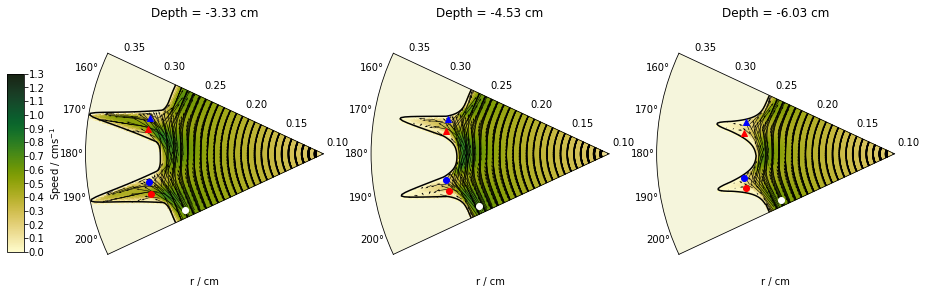

In [117]:
fig = plt.figure(figsize=(14.5,4.5))
ax0 = fig.add_subplot(131, projection='polar')
ax1 = fig.add_subplot(132, projection='polar')
ax2 = fig.add_subplot(133, projection='polar')

ax0.set_facecolor('beige')
ax1.set_facecolor('beige')
ax2.set_facecolor('beige')

nz1 = int(33/0.5)
nz2 = int(45/0.5)
nz3 = int(60/0.5)
tt = 9
thmesh, rmesh = np.meshgrid(Th,R)

max_spd = 1.4
min_spd = 0
cbar_ticks = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4]
fr = 200
nt = 25

# depth 3.3 cm
thvel_nomask, rvel_nomask = unstagger(state.U[tt,nz1,:,:].data,state.V[tt,nz1,:,:].data)
thvel = np.fliplr(np.ma.masked_array(thvel_nomask,mask=maskC[nz1,:,:]))
rvel = np.fliplr(np.ma.masked_array(rvel_nomask,mask=maskC[nz1,:,:]))
    
ux = rvel*np.cos(thmesh)-rmesh*np.sin(thmesh)*(-thvel/(rmesh))# minus is MITgcm convention
uy = rvel*np.sin(thmesh)+rmesh*np.cos(thmesh)*(-thvel/(rmesh)) 
spd = np.sqrt(ux**2+uy**2)
pcm1 = ax0.pcolormesh(Th,R,1E2*spd,cmap=cmo.cm.speed, vmin=0, vmax=1.3)
cbar_ax = fig.add_axes([0.05, 0.2, 0.016, 0.55])
cb = plt.colorbar(pcm1, cax=cbar_ax, ticks=cbar_ticks,format='%.1f')
cb.ax.yaxis.set_tick_params(pad=1)
cb.set_label('Speed / cms$^{-1}$')
ax0.contour(Th,R,grid.Depth.data,levels=[0.033],colors='k')
qv = ax0.quiver(thmesh[::5,::5],rmesh[::5,::5],
                ux[::5,::5],uy[::5,::5],scale=0.04, 
                color='k', units='width',pivot='middle')
ri_st1 = 110
thi_st1 = 310
ax0.plot(Th[thi_st1], R[ri_st1], 'wo')

r1_dns1 = 130
th1_dns1 = 277
ax0.plot(Th[th1_dns1], R[r1_dns1], 'bo')

r1_ups1 = 130
th1_ups1 = 287
ax0.plot(Th[th1_ups1], R[r1_ups1], 'ro')

r1_dns2 = 130
th1_dns2 = 222
ax0.plot(Th[th1_dns2], R[r1_dns2], 'b^')

r1_ups2 = 130
th1_ups2 = 232
ax0.plot(Th[th1_ups2], R[r1_ups2], 'r^')

# depth 4.5 cm
thvel_nomask, rvel_nomask = unstagger(state.U[tt,nz2,:,:].data,state.V[tt,nz2,:,:].data)
thvel = np.fliplr(np.ma.masked_array(thvel_nomask,mask=maskC[nz2,:,:]))
rvel = np.fliplr(np.ma.masked_array(rvel_nomask,mask=maskC[nz2,:,:]))
    
ux = rvel*np.cos(thmesh)-rmesh*np.sin(thmesh)*(-thvel/(rmesh))# minus is MITgcm convention
uy = rvel*np.sin(thmesh)+rmesh*np.cos(thmesh)*(-thvel/(rmesh)) 
spd = np.sqrt(ux**2+uy**2)
pcm2 = ax1.pcolormesh(Th,R,1E2*spd,cmap=cmo.cm.speed, vmin=0, vmax=1.3)
ax1.contour(Th,R,grid.Depth.data,levels=[0.045],colors='k')
qv = ax1.quiver(thmesh[::5,::5],rmesh[::5,::5],
                ux[::5,::5],uy[::5,::5],scale=0.04, 
                color='k', units='width',pivot='middle')

ri_st2 = 103
thi_st2 = 310
ax1.plot(Th[thi_st2], R[ri_st2], 'wo')

r2_dns1 = 121
th2_dns1 = 277
ax1.plot(Th[th2_dns1], R[r2_dns1], 'bo')

r2_ups1 = 121
th2_ups1 = 287
ax1.plot(Th[th2_ups1], R[r2_ups1], 'ro')

r2_dns2 = 121
th2_dns2 = 221
ax1.plot(Th[th2_dns2], R[r2_dns2], 'b^')

r2_ups2 = 121
th2_ups2 = 232
ax1.plot(Th[th2_ups2], R[r2_ups2], 'r^')

# depth 6.0 cm
thvel_nomask, rvel_nomask = unstagger(state.U[tt,nz3,:,:].data,state.V[tt,nz3,:,:].data)
thvel = np.fliplr(np.ma.masked_array(thvel_nomask,mask=maskC[nz3,:,:]))
rvel = np.fliplr(np.ma.masked_array(rvel_nomask,mask=maskC[nz3,:,:]))
    
ux = rvel*np.cos(thmesh)-rmesh*np.sin(thmesh)*(-thvel/(rmesh))# minus is MITgcm convention
uy = rvel*np.sin(thmesh)+rmesh*np.cos(thmesh)*(-thvel/(rmesh)) 
spd = np.sqrt(ux**2+uy**2)
pcm3 = ax2.pcolormesh(Th,R,1E2*spd,cmap=cmo.cm.speed, vmin=0, vmax=1.3)
ax2.contour(Th,R,grid.Depth.data,levels=[0.06],colors='k')
qv = ax2.quiver(thmesh[::5,::5],rmesh[::5,::5],
                ux[::5,::5],uy[::5,::5],scale=0.04, 
                color='k', units='width',pivot='middle')
ri_st3 = 90
thi_st3 = 310
ax2.plot(Th[thi_st3], R[ri_st3], 'wo')

r3_dns1 = 112
th3_dns1 = 277
ax2.plot(Th[th3_dns1], R[r3_dns1], 'bo')

r3_ups1 = 112
th3_ups1 = 287
ax2.plot(Th[th3_ups1], R[r3_ups1], 'ro')

r3_dns2 = 112
th3_dns2 = 221
ax2.plot(Th[th3_dns2], R[r3_dns2], 'b^')

r3_ups2 = 112
th3_ups2 = 232
ax2.plot(Th[th3_ups2], R[r3_ups2], 'r^')
ax0.set_xlabel(r'r / cm')
ax0.set_title('Depth = %1.2f cm'%(100*grid.RC[nz1]))
ax1.set_xlabel(r'r / cm')
ax1.set_title('Depth = %1.2f cm'%(100*grid.RC[nz2]))
ax2.set_xlabel(r'r / cm')
ax2.set_title('Depth = %1.2f cm'%(100*grid.RC[nz3]))
ax0.set_aspect(1)
ax0.set_xlim(np.pi*155/180,np.pi*205/180)
ax0.set_ylim(0.1,0.365)
ax1.set_aspect(1)
ax1.set_xlim(np.pi*155/180,np.pi*205/180)
ax1.set_ylim(0.1,0.365)
ax2.set_aspect(1)
ax2.set_xlim(np.pi*155/180,np.pi*205/180)
ax2.set_ylim(0.1,0.365)

#ax0.set_theta_offset((-np.pi*155)/180)
print('time = %1.0f s' %(tt*5))    
plt.show()

time = 45 s


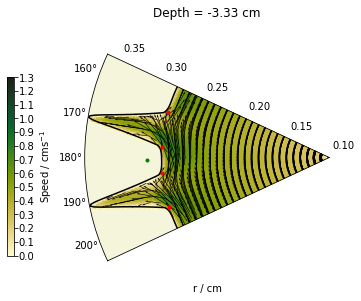

In [118]:
fig = plt.figure(figsize=(6,4.5))
ax0 = fig.add_subplot(111, projection='polar')

ax0.set_facecolor('beige')

nz1 = int(33/0.5)
tt = 9
thmesh, rmesh = np.meshgrid(Th,R)

max_spd = 1.4
min_spd = 0
cbar_ticks = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4]
fr = 200
nt = 25

# depth 3.3 cm
thvel_nomask, rvel_nomask = unstagger(state.U[tt,nz1,:,:].data,state.V[tt,nz1,:,:].data)
thvel = np.fliplr(np.ma.masked_array(thvel_nomask,mask=maskC[nz1,:,:]))
rvel = np.fliplr(np.ma.masked_array(rvel_nomask,mask=maskC[nz1,:,:]))
    
ux = rvel*np.cos(thmesh)-rmesh*np.sin(thmesh)*(-thvel/(rmesh))# minus is MITgcm convention
uy = rvel*np.sin(thmesh)+rmesh*np.cos(thmesh)*(-thvel/(rmesh)) 
spd = np.sqrt(ux**2+uy**2)
pcm1 = ax0.pcolormesh(Th,R,1E2*spd,cmap=cmo.cm.speed, vmin=0, vmax=1.3)
cbar_ax = fig.add_axes([0.05, 0.2, 0.016, 0.55])
cb = plt.colorbar(pcm1, cax=cbar_ax, ticks=cbar_ticks,format='%.1f')
cb.ax.yaxis.set_tick_params(pad=1)
cb.set_label('Speed / cms$^{-1}$')
ax0.contour(Th,R,grid.Depth.data,levels=[0.033],colors='k')
qv = ax0.quiver(thmesh[::5,::5],rmesh[::5,::5],
                ux[::5,::5],uy[::5,::5],scale=0.04, 
                color='k', units='width',pivot='middle')
ri_st1 = 120
thi_st1 = 298
ax0.plot(Th[thi_st1], R[ri_st1], 'ro', markersize=3)

ri_st1 = 120
thi_st1 = 267
ax0.plot(Th[thi_st1], R[ri_st1], 'ro', markersize=3)

ri_st1 = 120
thi_st1 = 243
ax0.plot(Th[thi_st1], R[ri_st1], 'ro', markersize=3)

ri_st1 = 120
thi_st1 = 212
ax0.plot(Th[thi_st1], R[ri_st1], 'ro', markersize=3)

r1_half = 130
th1_half = 243+12
ax0.plot(Th[th1_half], R[r1_half], 'go', markersize=3)

ax0.set_xlabel(r'r / cm')
ax0.set_title('Depth = %1.2f cm'%(100*grid.RC[nz1]))
ax0.set_aspect(1)
ax0.set_xlim(np.pi*155/180,np.pi*205/180)
ax0.set_ylim(0.1,0.365)

#ax0.set_theta_offset((-np.pi*155)/180)
print('time = %1.0f s' %(tt*5))    
plt.show()

Depth = -3.33 cm


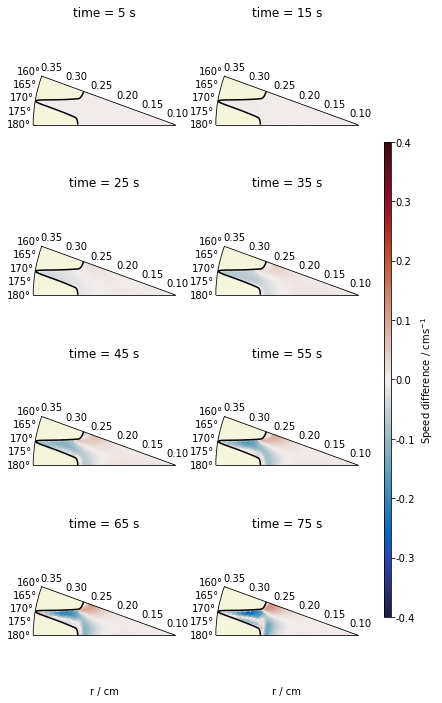

In [121]:
nz1 = int(33/0.5)
thmesh, rmesh = np.meshgrid(Th,R)

max_spd = 0.4
min_spd = -0.4
cbar_ticks = [-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4]

fig = plt.figure(figsize=(6,12))
ax0 = fig.add_subplot(421, projection='polar')
ax1 = fig.add_subplot(422, projection='polar')
ax2 = fig.add_subplot(423, projection='polar')
ax3 = fig.add_subplot(424, projection='polar')
ax4 = fig.add_subplot(425, projection='polar')
ax5 = fig.add_subplot(426, projection='polar')
ax6 = fig.add_subplot(427, projection='polar')
ax7 = fig.add_subplot(428, projection='polar')

axs = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7]

for tt, ax in zip(range(1,17,2),axs):
    ax.set_facecolor('beige')

    # depth 3.3 cm
    thvel_nomask, rvel_nomask = unstagger(state.U[tt,nz1,:,:].data,state.V[tt,nz1,:,:].data)
    thvel = np.fliplr(np.ma.masked_array(thvel_nomask,mask=maskC[nz1,:,:]))
    rvel = np.fliplr(np.ma.masked_array(rvel_nomask,mask=maskC[nz1,:,:]))

    ux = rvel*np.cos(thmesh)-rmesh*np.sin(thmesh)*(-thvel/(rmesh))# minus is MITgcm convention
    uy = rvel*np.sin(thmesh)+rmesh*np.cos(thmesh)*(-thvel/(rmesh)) 
    spd = np.sqrt(ux**2+uy**2)

    # Plot upstream - downstream canyons
    pcm1 = ax.pcolormesh(Th[200:255],R[:],1E2*spd[:,255:310]-1E2*spd[:,200:255],
                         cmap=cmo.cm.balance, 
                         vmin=min_spd, vmax=max_spd)
    ax.contour(Th,R,grid.Depth.data,levels=[0.033],colors='k')

    ax.set_title('time = %1.0f s' %(tt*5))
    ax.set_aspect(1)
    ax.set_xlim(np.pi*160/180,np.pi*180/180)
    ax.set_ylim(0.1,0.365)

    #ax0.set_theta_offset((-np.pi*155)/180)

cbar_ax = fig.add_axes([0.95, 0.2, 0.016, 0.55])
cb = plt.colorbar(pcm1, cax=cbar_ax, ticks=cbar_ticks,format='%.1f')
cb.ax.yaxis.set_tick_params(pad=1)
cb.set_label('Speed difference / cms$^{-1}$')
        
print('Depth = %1.2f cm'%(100*grid.RC[nz1]))    
ax7.set_xlabel(r'r / cm')
ax6.set_xlabel(r'r / cm')
        
plt.show()

Depth = -3.33 cm


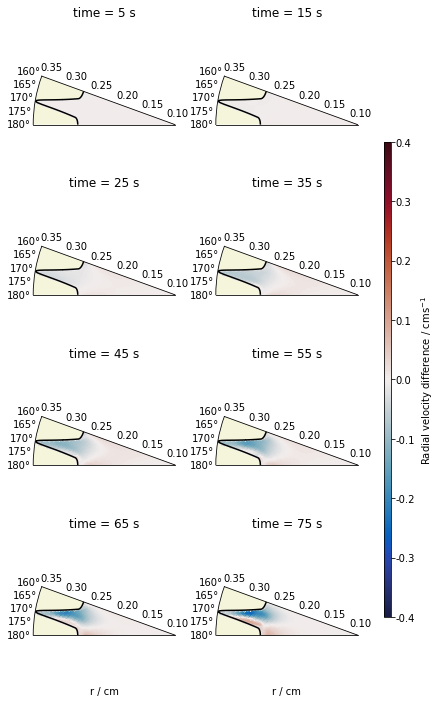

In [122]:
nz1 = int(33/0.5)
thmesh, rmesh = np.meshgrid(Th,R)

max_spd = 0.4
min_spd = -0.4
cbar_ticks = [-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4]

fig = plt.figure(figsize=(6,12))
ax0 = fig.add_subplot(421, projection='polar')
ax1 = fig.add_subplot(422, projection='polar')
ax2 = fig.add_subplot(423, projection='polar')
ax3 = fig.add_subplot(424, projection='polar')
ax4 = fig.add_subplot(425, projection='polar')
ax5 = fig.add_subplot(426, projection='polar')
ax6 = fig.add_subplot(427, projection='polar')
ax7 = fig.add_subplot(428, projection='polar')

axs = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7]

for tt, ax in zip(range(1,17,2),axs):
    ax.set_facecolor('beige')

    # depth 3.3 cm
    thvel_nomask, rvel_nomask = unstagger(state.U[tt,nz1,:,:].data,state.V[tt,nz1,:,:].data)
    thvel = np.fliplr(np.ma.masked_array(thvel_nomask,mask=maskC[nz1,:,:]))
    rvel = np.fliplr(np.ma.masked_array(rvel_nomask,mask=maskC[nz1,:,:]))

    # Plot upstream - downstream canyons
    pcm1 = ax.pcolormesh(Th[200:255],R[:],1E2*rvel[:,255:310]-1E2*rvel[:,200:255],
                         cmap=cmo.cm.balance, 
                         vmin=min_spd, vmax=max_spd)
    ax.contour(Th,R,grid.Depth.data,levels=[0.033],colors='k')

    ax.set_title('time = %1.0f s' %(tt*5))
    ax.set_aspect(1)
    ax.set_xlim(np.pi*160/180,np.pi*180/180)
    ax.set_ylim(0.1,0.365)

    #ax0.set_theta_offset((-np.pi*155)/180)

cbar_ax = fig.add_axes([0.95, 0.2, 0.016, 0.55])
cb = plt.colorbar(pcm1, cax=cbar_ax, ticks=cbar_ticks,format='%.1f')
cb.ax.yaxis.set_tick_params(pad=1)
cb.set_label('Radial velocity difference / cms$^{-1}$')
        
print('Depth = %1.2f cm'%(100*grid.RC[nz1]))    
ax7.set_xlabel(r'r / cm')
ax6.set_xlabel(r'r / cm')
        
plt.show()

Depth = -3.33 cm


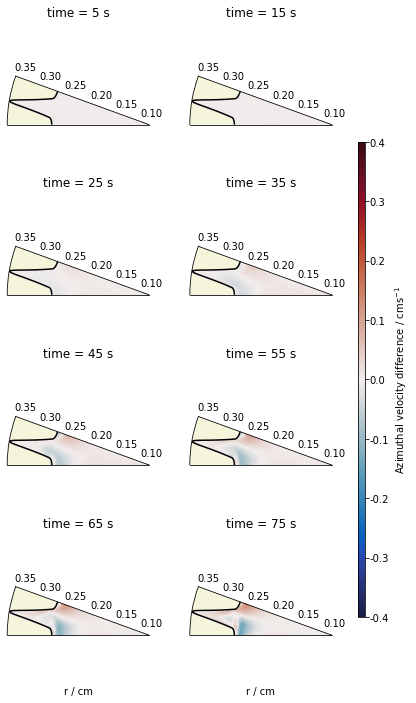

In [123]:
nz1 = int(33/0.5)
thmesh, rmesh = np.meshgrid(Th,R)

max_spd = 0.4
min_spd = -0.4
cbar_ticks = [-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4]

fig = plt.figure(figsize=(6,12))
ax0 = fig.add_subplot(421, projection='polar')
ax1 = fig.add_subplot(422, projection='polar')
ax2 = fig.add_subplot(423, projection='polar')
ax3 = fig.add_subplot(424, projection='polar')
ax4 = fig.add_subplot(425, projection='polar')
ax5 = fig.add_subplot(426, projection='polar')
ax6 = fig.add_subplot(427, projection='polar')
ax7 = fig.add_subplot(428, projection='polar')

axs = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7]

for tt, ax in zip(range(1,17,2),axs):
    ax.set_facecolor('beige')

    # depth 3.3 cm
    thvel_nomask, rvel_nomask = unstagger(state.U[tt,nz1,:,:].data,state.V[tt,nz1,:,:].data)
    thvel = np.fliplr(np.ma.masked_array(thvel_nomask,mask=maskC[nz1,:,:]))
    rvel = np.fliplr(np.ma.masked_array(rvel_nomask,mask=maskC[nz1,:,:]))

    # Plot upstream - downstream canyons
    pcm1 = ax.pcolormesh(Th[200:255],R[:],1E2*thvel[:,255:310]-1E2*thvel[:,200:255],
                         cmap=cmo.cm.balance, 
                         vmin=min_spd, vmax=max_spd)
    ax.contour(Th,R,grid.Depth.data,levels=[0.033],colors='k')

    ax.set_title('time = %1.0f s' %(tt*5))
    ax.set_aspect(1)
    ax.set_xlim(np.pi*160/180,np.pi*180/180)
    ax.set_ylim(0.1,0.365)
    ax.set_xticks([])   
    #ax0.set_theta_offset((-np.pi*155)/180)

cbar_ax = fig.add_axes([0.95, 0.2, 0.016, 0.55])
cb = plt.colorbar(pcm1, cax=cbar_ax, ticks=cbar_ticks,format='%.1f')
cb.ax.yaxis.set_tick_params(pad=1)
cb.set_label('Azimuthal velocity difference / cms$^{-1}$')
        
print('Depth = %1.2f cm'%(100*grid.RC[nz1]))    
ax7.set_xlabel(r'r / cm')
ax6.set_xlabel(r'r / cm')
     
plt.show()